In [38]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Fraud_check.csv")

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
df['Taxable.Income']=np.where(df['Taxable.Income']<= 30000, "Risky", "Good")

In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [10]:
df.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [11]:
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [12]:
df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [14]:
le=LabelEncoder()

In [15]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [16]:
df['Undergrad']= le.fit_transform(df['Undergrad'])

In [18]:
df['Marital.Status']= le.fit_transform(df['Marital.Status'])
df['Taxable.Income']= le.fit_transform(df['Taxable.Income'])
df['Urban']= le.fit_transform(df['Urban'])


In [19]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [20]:
x=df.drop('Taxable.Income',axis=1)

In [21]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [22]:
y=df["Taxable.Income"]

In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [25]:
y.value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [31]:
x_train.shape,y_train.shape

((480, 5), (480,))

In [32]:
x_test.shape,y_test.shape

((120, 5), (120,))

In [40]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(167.4, 195.696, 'X[2] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(104.625, 152.208, 'X[3] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(83.7, 108.72, 'X[2] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(41.85, 65.232, 'X[4] <= 0.5\nentropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(20.925, 21.744, 'entropy = 0.964\nsamples = 18\nvalue = [11, 7]'),
 Text(62.775000000000006, 21.744, 'entropy = 0.503\nsamples = 18\nvalue = [16, 2]'),
 Text(125.55000000000001, 65.232, 'X[4] <= 0.5\nentropy = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(104.625, 21.744, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(146.475, 21.744, 'entropy = 0.65\nsamples = 24\nvalue = [20, 4]'),
 Text(125.55000000000001, 108.72, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(230.175, 152.208, 'X[2] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]'),
 Text(209.25, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = [0, 

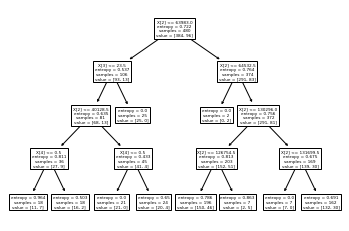

In [41]:
tree.plot_tree(model)

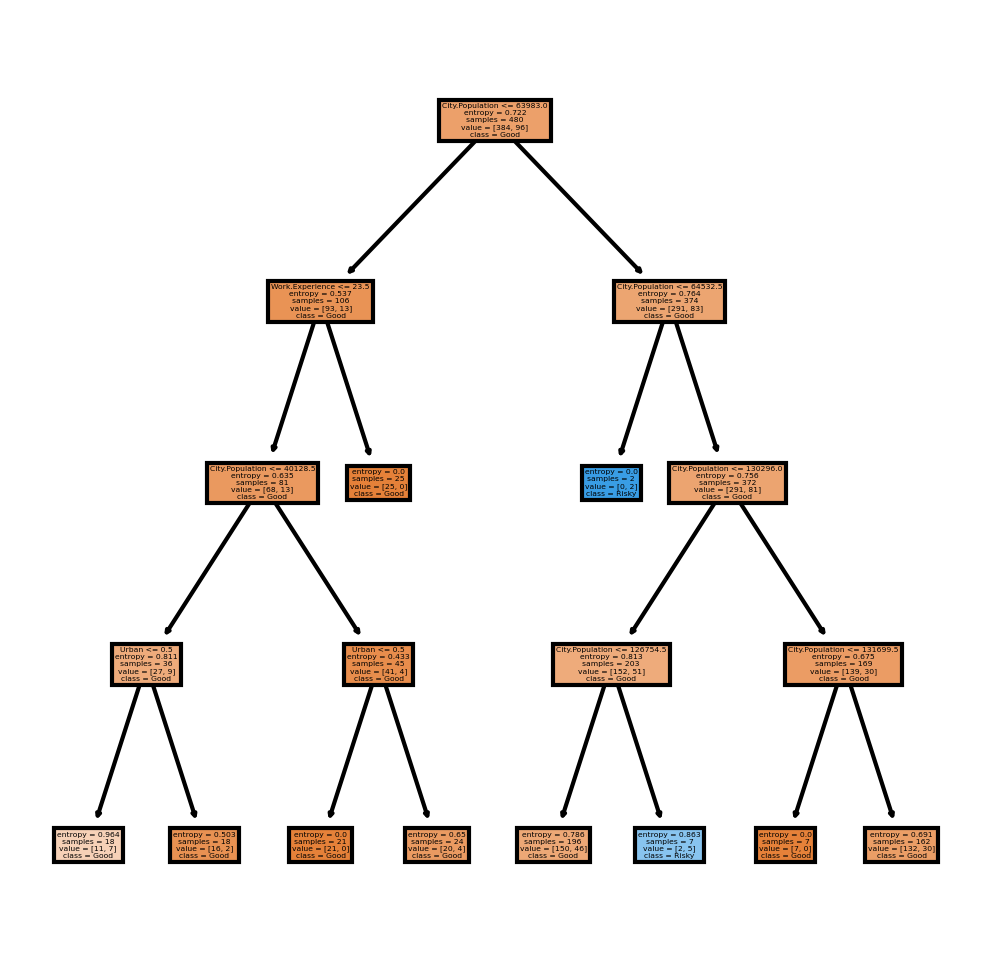

In [42]:
fn=['Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [43]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    117
1      3
dtype: int64

In [44]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable.Income,,
0,90,2
1,27,1


In [45]:
np.mean(preds==y_test)

0.7583333333333333